In [1]:
%matplotlib inline

In [2]:
import os
import shutil

In [3]:
def parameters2columns(parameters):
    import yaml
    
    d_orig = yaml.load(parameters['content'])
    d = dict()
    for k, v in d_orig.iteritems():
        d["--" + k] = v
    return pd.Series(d)

In [4]:
import pandas as pd
from sumatra.projects import load_project

project = load_project('.')
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)

/data/guyer/sumatra/sumatra/programs.py:77: Warning: Python could not be found. Please supply the path to the /tmp/guyer/miniconda2/envs/cluster_fipy/bin/python executable.
  warnings.warn(errmsg)
/data/guyer/sumatra/sumatra/programs.py:77: Warning: /tmp/guyer/miniconda2/envs/cluster_fipy/bin/mpiexec could not be found. Please supply the path to the /tmp/guyer/miniconda2/envs/cluster_fipy/bin/mpiexec executable.
  warnings.warn(errmsg)
/data/guyer/sumatra/sumatra/parameters.py:156: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.values = yaml.load(initialiser)
/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [5]:
df.columns

Index([            u'datastore',          u'dependencies',
                        u'diff',              u'duration',
                  u'executable',            u'input_data',
             u'input_datastore',                 u'label',
                 u'launch_mode',             u'main_file',
                     u'outcome',           u'output_data',
                  u'parameters',             u'platforms',
                      u'reason',               u'repeats',
                  u'repository',      u'script_arguments',
               u'stdout_stderr',                  u'tags',
                   u'timestamp',                  u'user',
                     u'version',                  u'--Lx',
                        u'--Ly',          u'--checkpoint',
                        u'--dt',                  u'--dx',
                    u'--factor',             u'--restart',
                  u'--savetime',       u'--sumatra_label',
                 u'--totaltime', u'--checkpoint_interval

In [6]:
print df['launch_mode'].iloc[44]['parameters']['n']

IndexError: single positional indexer is out-of-bounds

In [7]:
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


## Clean out debugging runs

In [8]:
df[df['tags'].map(lambda x: '_initialized_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart


In [9]:
def delete_smt_record(label):
    project.delete_record(label, delete_data=True)
    shutil.rmtree(os.path.join("Data", label))

In [10]:
    
df[df['tags'].map(lambda x: '_initialized_' in x)].label.apply(delete_smt_record)

Series([], Name: label, dtype: object)

In [11]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [12]:
df[df['tags'].map(lambda x: '_running_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
22,31e46d8ab732,2019-10-16 22:51:36,NaN,[_running_],abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,1000.0,1000.0,0.8,0.04,1.1,None


In [20]:
delete_smt_record("e0c72c426b3e")

OSError: [Errno 39] Directory not empty: 'Data/e0c72c426b3e'

In [22]:
shutil.rmtree(os.path.join("Data", "e0c72c426b3e"))

In [26]:
delete_smt_record("7aeb901c4209")

In [27]:
delete_smt_record("ec8146cf7385")

In [28]:
delete_smt_record("beb034f2217c")

In [29]:
delete_smt_record("b8d0044ef16f")

In [13]:
delete_smt_record("31e46d8ab732")

In [15]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [16]:
delete_smt_record("135ad521487c")

### other stuff

In [83]:
df[df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
29,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN
30,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN


In [69]:
print df.loc[df['label'] == '9fe80a61913f'].iloc[0]['stdout_stderr']

Not yet captured.


In [12]:
import fipy as fp

In [39]:
phi, = fp.tools.dump.read("Data/e97d9c91f2b4/t=80.0.tar.gz")

In [13]:
from matplotlib import pyplot as plt

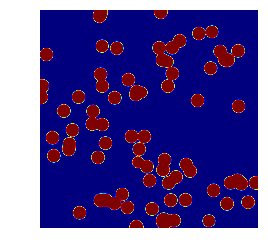

In [66]:
im = plt.imshow(d, cmap='jet', norm=None, aspect=None, interpolation=None,
   alpha=None, vmin=0., vmax=1., origin=None, extent=None)
im.axes.axis('off')
im.write_png("Data/e97d9c91f2b4/t=80.0.png")

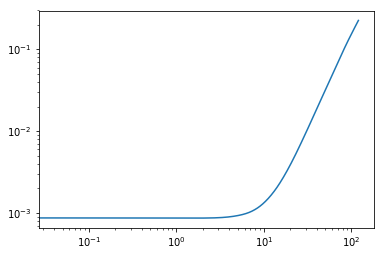

In [137]:
tt, fraction, energy = fp.numerix.loadtxt("Data/e97d9c91f2b4/stats.txt".format(uuid), unpack=True)
plt.loglog(tt, -fp.tools.log10(1-fraction))

## Benchmark 8a

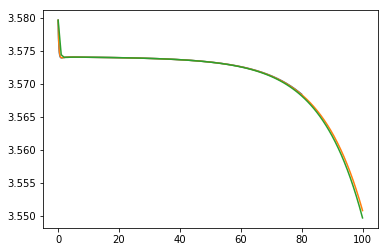

In [117]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

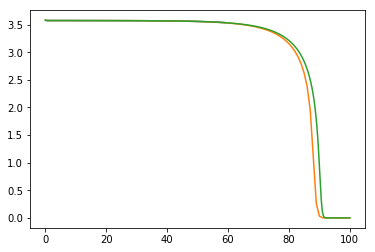

In [122]:
for uuid in ['ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

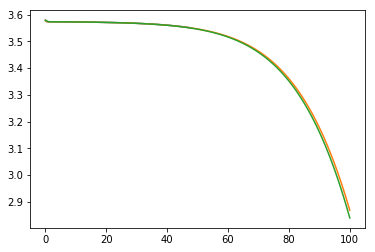

In [124]:
for uuid in ['5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

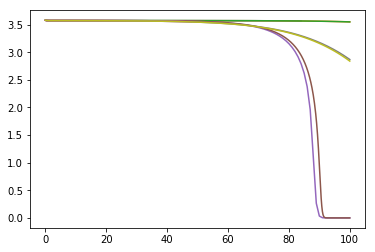

In [125]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

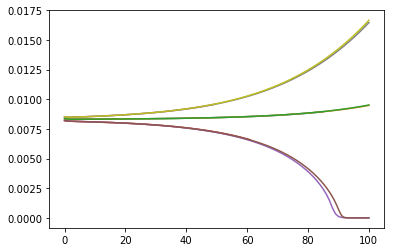

In [126]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, fraction)

In [129]:
!ls -lt Data/5b147f7a03fc

total 47020
-rw-r--r-- 1 guyer dialout 949719 Oct 16 17:16 t=50.0.tar.gz
-rw-r--r-- 1 guyer dialout 377498 Oct 16 17:16 stats.txt
-rw-r--r-- 1 guyer dialout 950482 Oct 16 17:15 t=49.0.tar.gz
-rw-r--r-- 1 guyer dialout 950439 Oct 16 17:14 t=48.0.tar.gz
-rw-r--r-- 1 guyer dialout 949766 Oct 16 17:12 t=47.0.tar.gz
-rw-r--r-- 1 guyer dialout 949801 Oct 16 17:11 t=46.0.tar.gz
-rw-r--r-- 1 guyer dialout 949731 Oct 16 17:10 t=45.0.tar.gz
-rw-r--r-- 1 guyer dialout 949274 Oct 16 17:09 t=44.0.tar.gz
-rw-r--r-- 1 guyer dialout 950429 Oct 16 17:08 t=43.0.tar.gz
-rw-r--r-- 1 guyer dialout 949111 Oct 16 17:07 t=42.0.tar.gz
-rw-r--r-- 1 guyer dialout 950288 Oct 16 17:06 t=41.0.tar.gz
-rw-r--r-- 1 guyer dialout 950754 Oct 16 17:05 t=40.0.tar.gz
-rw-r--r-- 1 guyer dialout 949666 Oct 16 17:03 t=39.0.tar.gz
-rw-r--r-- 1 guyer dialout 949179 Oct 16 17:02 t=38.0.tar.gz
-rw-r--r-- 1 guyer dialout 950384 Oct 16 17:01 t=37.0.tar.gz
-rw-r--r-- 1 guyer dialout 950945 Oct 16 17:00 t=36.0.tar.gz
-rw-r--r-- 1 guy

## Benchmark 8b

In [9]:
df[df['main_file'] == 'benchmark8b.py'][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],100.0,100.0,0.8,0.04,1.1,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],100.0,100.0,0.8,0.04,1.1,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
21,36ac86beed75,2019-10-16 17:57:12,17601.494615,[_failed_],1000.0,1000.0,0.8,0.04,1.1,Data/e97d9c91f2b4/t=116.0.tar.gz


In [136]:
print df.loc[df['label'] == 'e97d9c91f2b4']['launch_mode'].iloc[0]['parameters']['n']

64


In [10]:
!ls -lt Data/36ac86beed75

total 390092
-rw-r--r-- 1 guyer dialout    46556 Oct 16 22:51 Sumatra.36ac86beed75.json
-rw-r--r-- 1 guyer dialout       40 Oct 16 22:51 Treant.02d51a46-379d-43f7-971f-3fbe0d057d72.json
-rw-r--r-- 1 guyer dialout        0 Oct 16 22:50 t=236.0.tar.gz
-rw-r--r-- 1 guyer dialout   458926 Oct 16 22:50 stats.txt
-rw-r--r-- 1 guyer dialout  8199075 Oct 16 22:41 t=232.0.tar.gz
-rw-r--r-- 1 guyer dialout  8546762 Oct 16 22:31 t=228.0.tar.gz
-rw-r--r-- 1 guyer dialout  8917753 Oct 16 22:22 t=224.0.tar.gz
-rw-r--r-- 1 guyer dialout  9202104 Oct 16 22:12 t=220.0.tar.gz
-rw-r--r-- 1 guyer dialout  9523234 Oct 16 22:02 t=216.0.tar.gz
-rw-r--r-- 1 guyer dialout  9886555 Oct 16 21:53 t=212.0.tar.gz
-rw-r--r-- 1 guyer dialout 10232790 Oct 16 21:43 t=208.0.tar.gz
-rw-r--r-- 1 guyer dialout 10596946 Oct 16 21:34 t=204.0.tar.gz
-rw-r--r-- 1 guyer dialout 11009945 Oct 16 21:24 t=200.0.tar.gz
-rw-r--r-- 1 guyer dialout 11447809 Oct 16 21:14 t=196.0.tar.gz
-rw-r--r-- 1 guyer dialout 11864608 Oct 16 21:04 t=

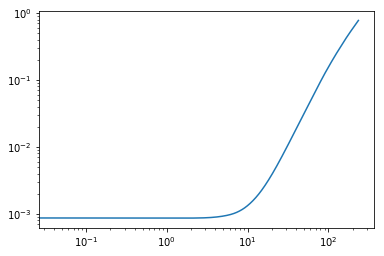

In [15]:
tt, fraction, energy = fp.numerix.loadtxt("Data/36ac86beed75/stats.txt", unpack=True)
plt.loglog(tt, -fp.tools.log10(1-fraction))

## Benchmark 8c

In [17]:
df[df['main_file'] == 'benchmark8c.py'][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
22,a8d8c8c53199,2019-10-17 17:03:28,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
23,65ac831fdaaf,2019-10-17 19:09:00,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
24,8c61a15b939e,2019-10-17 19:12:21,5438.171248,[_finished_],1000.0,1000.0,0.8,4.00,1.1,None
25,5a7ce705a1c9,2019-10-17 20:43:49,NaN,[_running_],1000.0,1000.0,0.8,0.40,1.1,None


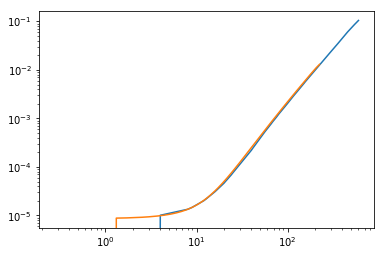

In [19]:
for uuid in ['8c61a15b939e', '5a7ce705a1c9']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{uuid}/stats.txt".format(uuid=uuid), unpack=True)
    plt.loglog(tt, -fp.tools.log10(1-fraction))

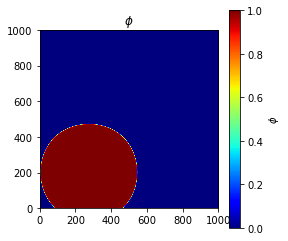

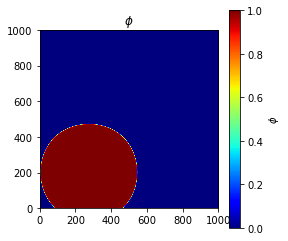

In [25]:
phi, = fp.tools.dump.read("Data/8c61a15b939e/t=600.0.tar.gz")
fp.Viewer(vars=phi).plot()

In [24]:
phi, = fp.tools.dump.read("Data/5a7ce705a1c9/t=300.0.tar.gz")
fp.Viewer(vars=phi).plot()

IOError: [Errno 2] No such file or directory: 'Data/5a7ce705a1c9/t=300.0.tar.gz'